# Visualizations

#### <span style="color:blue"> All visualizations have been generated inline. So saving visualizations has been avoided.</span>

##### <span style="color:green"> Visualizations are for reference only. Formatting or Beautification needs to be done from your side.</span>

### Imports

In [1]:
# Usage of the imports will be referenced wherever applicable
import urllib
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.datasets as skds

from matplotlib import pyplot as plt

### Sample data set view

In [2]:
# Load the data to view information 
sample_ds = skds.load_iris()
sample_df = pd.DataFrame(sample_ds.data, columns=sample_ds.feature_names)
sample_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Functions

In [3]:
# Function to load existing IRIS dataset from sklearn package
def get_iris_df():
    # Load from Iris
    ds = skds.load_iris()
    
    # Create a data frame using data and feature_names
    df = pd.DataFrame(ds.data,columns = ds.feature_names)
    
    # Generate code_species_map based on target_names
    code_species_map = dict(zip(range(3), ds.target_names))
    
    # Update the data frame with species column
    df['species'] = [code_species_map[c] for c in ds.target]
    return df

### Get Data and Check Info

In [4]:
# Get Data Frame to Verify
df = get_iris_df()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Grouping to generate Data for Plotting

In [5]:
# Sum by Species - Grouping Species
print (df.groupby('species').sum())

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  250.3             171.4               73.1   
versicolor              296.8             138.5              213.0   
virginica               329.4             148.7              277.6   

            petal width (cm)  
species                       
setosa                  12.3  
versicolor              66.3  
virginica              101.3  


## Line Chart

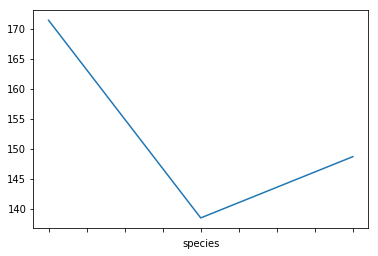

In [6]:
# Simple Line Plot
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='line')
plt.rcParams['figure.figsize'] = [12, 8] # Applied here to show bigger plots later
plt.show()

## Pie Charts

### Single Variable Plotting

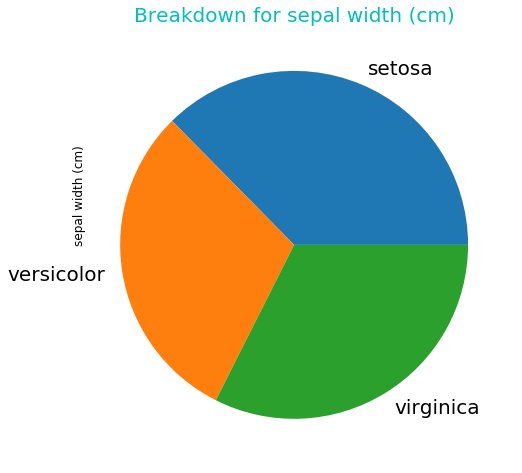

In [7]:
# Plot the dataframe on a pie chart 
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)

# Label, Title
plt.ylabel(var, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12)
plt.title('Breakdown for ' + var, fontsize = 20, color='c')
plt.show()
plt.close()

### Every Variable Plotting

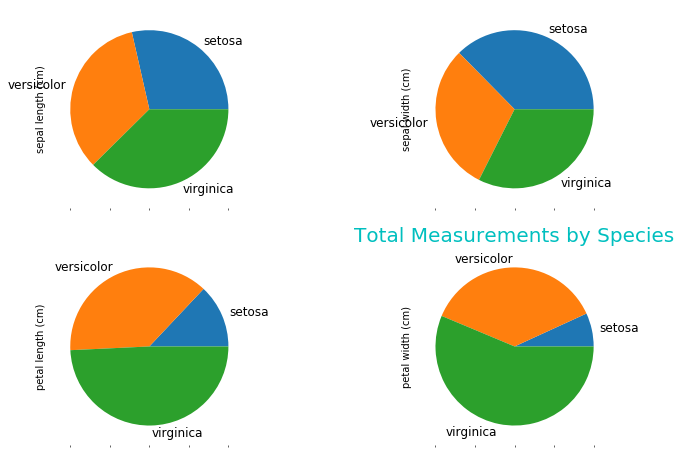

In [8]:
# Plotting Pie Charts for Data Frame
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True, layout=(2,2), legend=False, fontsize=12)

# Title
plt.title('Total Measurements by Species', fontsize=20, color='c')
plt.show()
plt.close()

## Bar Charts

### Single Variable Plotting

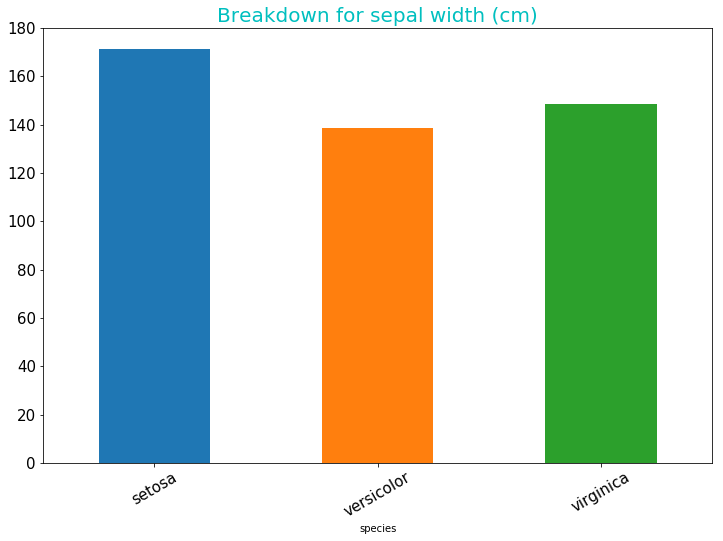

In [9]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot( kind='bar', fontsize=15, rot=30 )

# Label, Title
plt.title('Breakdown for ' + var, fontsize=20, color='c')
plt.show()
plt.close() 

### Every Variable Plotting

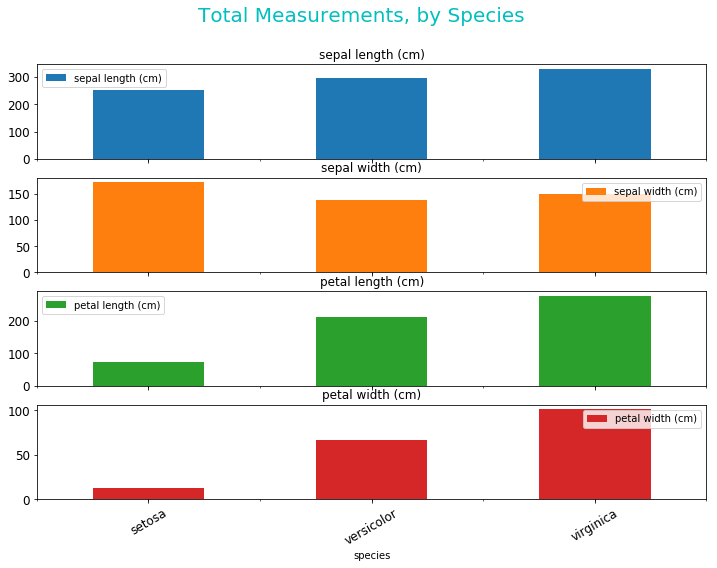

In [10]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot( kind='bar', subplots=True, fontsize=12, rot=30 )

# Title
plt.suptitle('Total Measurements, by Species' ,fontsize=20, color='c')
plt.legend(loc='upper right')
plt.show()
plt.close() 

## Histograms

### Every Variable

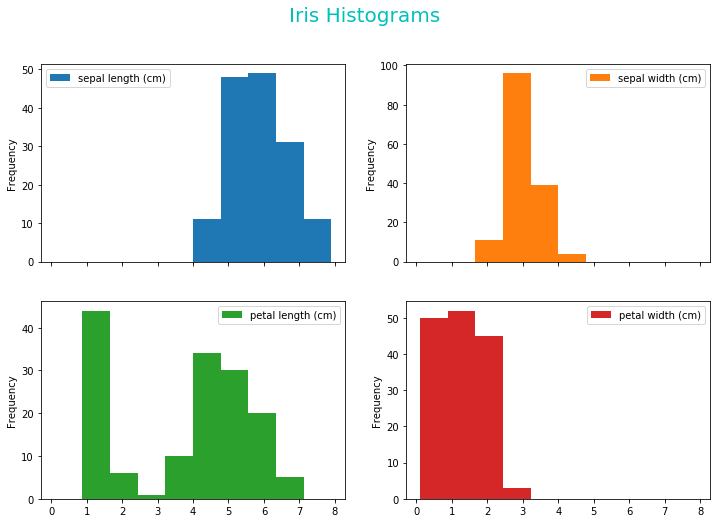

In [11]:
sums_by_species = df.groupby('species').sum()
df.plot(kind='hist', subplots=True, layout=(2,2))

# Show, Close
plt.suptitle('Iris Histograms', fontsize=20, color='c')
plt.show()
plt.close() 

### Combined

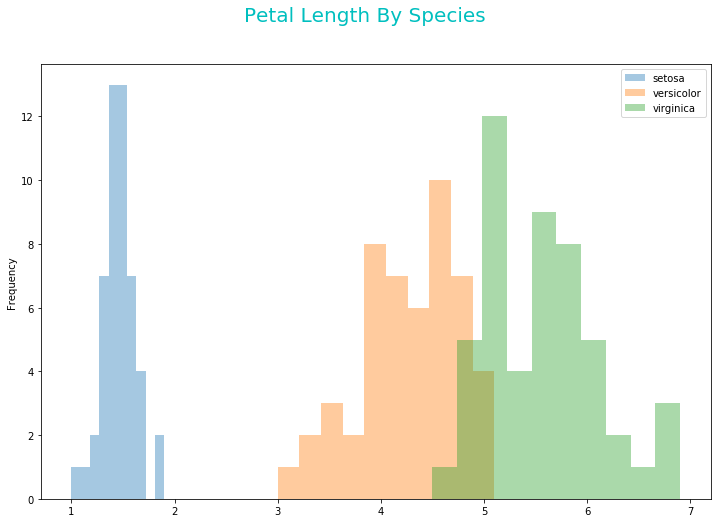

In [12]:
# Plot by Species
for spec in df['species'].unique():
    forspec = df[df['species'] == spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)

# Show, Close
plt.legend(loc='upper right')
plt.suptitle('Petal Length By Species', fontsize=20, color='c')
plt.show()
plt.close() 

# Simple Metrics

## Means, Standard Deviations, Medians & Quantiles

### Get simple metric from Data Frame

In [13]:
# Single Column Summary
col = df['petal length (cm)']
col.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64

In [14]:
# Entire Data Summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# Entire Data Summary including categories
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Generate Metrics Manually from simple functions

In [16]:
# Single Column
col = df['petal length (cm)']
mean = col.mean()
std = col.std()
median = col.quantile(0.5)
perc25 = col.quantile(0.25)
perc50 = col.quantile(0.5)
perc75 = col.quantile(0.75)
print('Mean: ', mean)
print('Standard Deviation: ', std)
print('Percentile 25: ', perc25)
print('Percentile 50: ', perc50)
print('Percentilem75: ', perc75)
print('Median: ', median)
print('Clean Avg:', col[(col>perc25) & (col<perc75)].mean())

Mean:  3.7580000000000027
Standard Deviation:  1.7652982332594667
Percentile 25:  1.6
Percentile 50:  4.35
Percentilem75:  5.1
Median:  4.35
Clean Avg: 4.0984375


## Box Plots

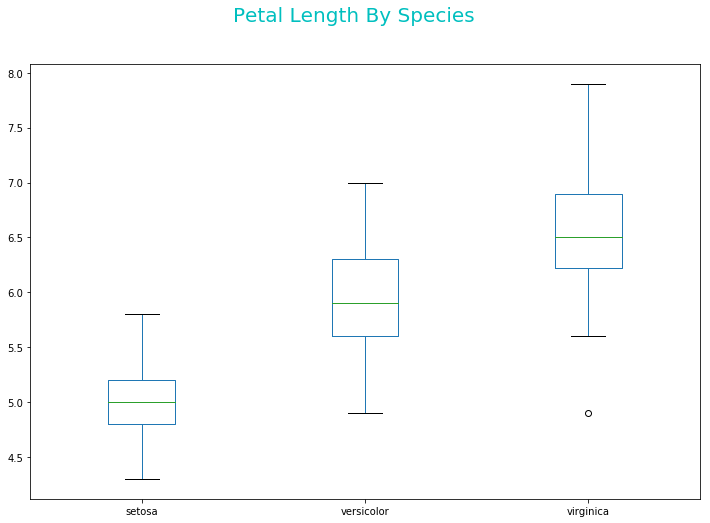

In [17]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i % 50)
df.pivot('ind', 'species')[col].plot(kind='box')

# Show, Close
plt.suptitle('Petal Length By Species', fontsize=20, color='c')
plt.show()
plt.close() 

## Scatter Plots

### Simple

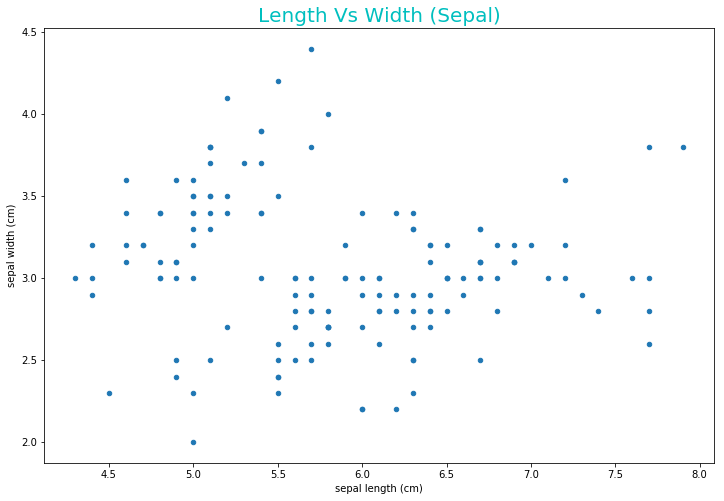

In [18]:
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

# Show, Close
plt.title("Length Vs Width (Sepal)", fontsize=20, color='c')
plt.show()
plt.close() 

### With Color Coding & Markers

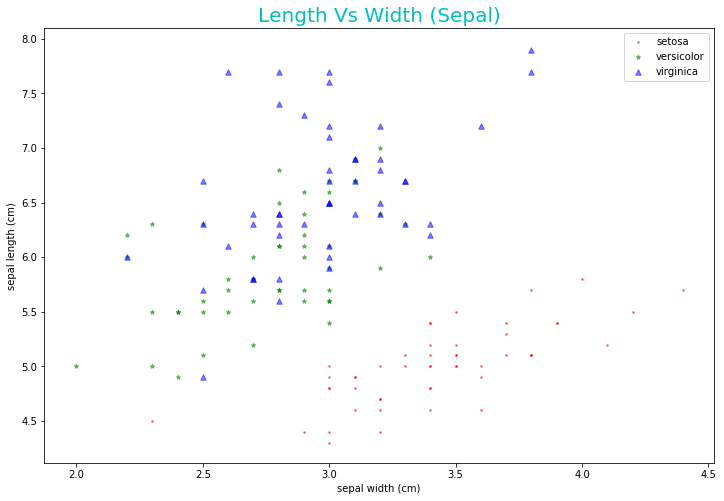

In [19]:
## Color Coding & Markers
colors = [ "r", "g", "b"]
markers = [".", "*", "^"]

# Get Figure and Axes from Subplots
fig, ax = plt.subplots(1,1)

# Iterate over species and generate subplots with varying markers
for i, spec in enumerate(df['species'].unique()):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter", x="sepal width (cm)", y="sepal length (cm)", 
             alpha=0.5, s=10*(i+1), ax=ax,
            color=colors[i], marker=markers[i], label=spec)

# Show, Close
plt.legend()
plt.title("Length Vs Width (Sepal)", fontsize=20, color='c')
plt.show()
plt.close()

### Load New Data from Boston Area

In [22]:
boston_ds = skds.load_boston()
boston_df = pd.DataFrame(boston_ds.data, columns=boston_ds.feature_names)
boston_df['MEDV'] = boston_ds.target

### Scatter plot with Comparision of Normal Vs Logarithmic Axes

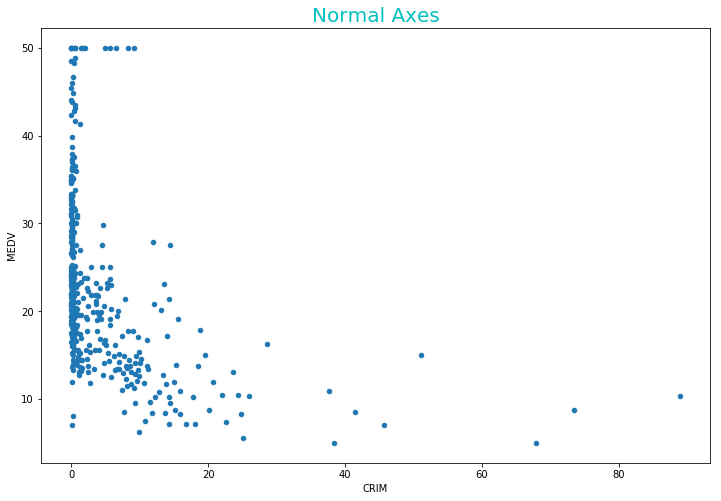

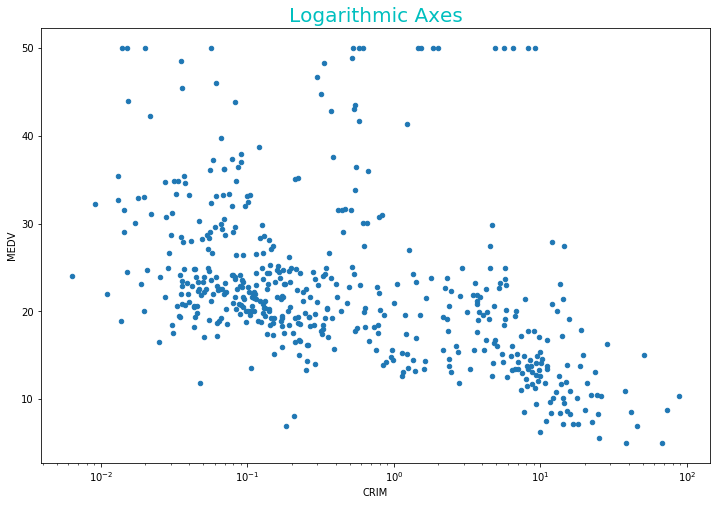

In [34]:
# Normal
boston_df.plot(x='CRIM', y='MEDV', kind='scatter')
plt.title("Normal Axes", fontsize=20, color='c')
plt.show()
plt.close()

# Logarithmic
boston_df.plot(x='CRIM', y='MEDV', kind='scatter', logx=True)
plt.title("Logarithmic Axes", fontsize=20, color='c')
plt.show()
plt.close()